# Data exploration in SAR Images - Using Numpy arrays

make a distribution analysis by array, combine them all together, and make a distribution with all of them and see what I get

In [1]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath('../..'))


from offshore_wind_nj.data_loader import data_files, load_data, all_arrays, extract_datetime_from_filename
from offshore_wind_nj.sar_wind_plot import plot_wind_field, plot_wind_field_by_arrays
# load_data(data_files) # Load the files in the module 'data_loader'

2024-10-27 13:49:42.859 | INFO     | offshore_wind_nj.config:<module>:11 - PROJ_ROOT path is: /nfs/storage1/home/noriegac/Documents/Offshore Wind Research
/nfs/storage1/home/noriegac/Documents/Offshore Wind Research/offshore_wind_nj/data_cleaning.py:10: RuntimeWarning: invalid value encountered in divide
  weights /= weights.sum(axis=1, keepdims=True)


IndexError: index 0 is out of bounds for axis 0 with size 0

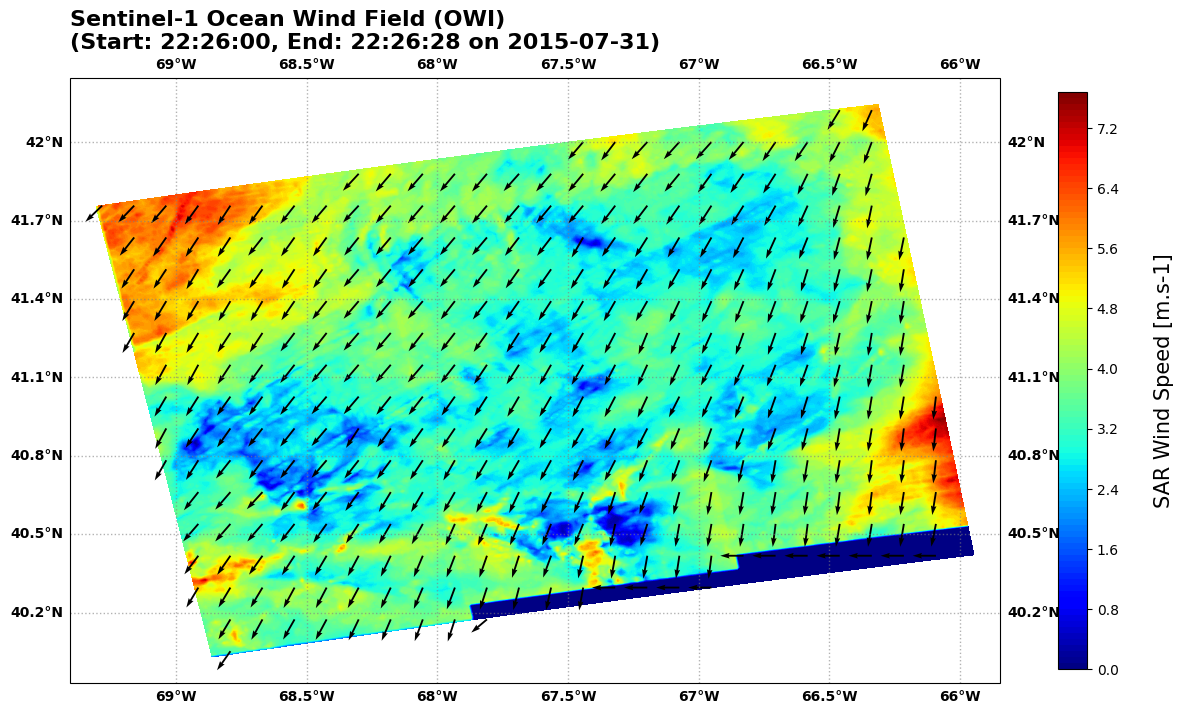

# Data cleaning
Fill images where speed = 0 with adjacent speeds

In [62]:
sample_data_cleaning = all_arrays[25]#[0]#.shape#[...,254].shape

In [63]:
sample_data_cleaning[0]

array([[6.457004 , 7.8906183, 8.2005005, ..., 0.       , 0.       ,
        0.       ],
       [6.2691026, 8.059928 , 8.069488 , ..., 0.       , 0.       ,
        0.       ],
       [6.737726 , 8.084535 , 7.8131485, ..., 0.       , 0.       ,
        0.       ],
       ...,
       [1.1299236, 5.9037776, 6.3113723, ..., 0.       , 0.       ,
        0.       ],
       [1.2321101, 6.0670195, 7.0140743, ..., 0.       , 0.       ,
        0.       ],
       [1.215738 , 6.636563 , 6.479719 , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [86]:
def idw_interpolation(coords, values, target_coords, k=4, p=2):
    tree = cKDTree(coords)
    distances, indices = tree.query(target_coords, k=k)
    
    # Calculate weights
    weights = 1 / (distances ** p)
    weights /= weights.sum(axis=1, keepdims=True)
    
    # Interpolated values
    return np.sum(values[indices] * weights, axis=1)

def fill_zeros(array):
    """
    Fill missing or zero-speed values using IDW interpolation.
    
    Parameters:
    array : tuple of np.ndarray
        A tuple containing speed, direction, latitude, and longitude arrays.
    
    Returns:
    tuple of np.ndarray
        Filled speed, filled direction, latitude, and longitude arrays.
    """
    speed = array[0]
    direction = array[1]
    lat = array[2]
    lon = array[3]
    
    # Identify pixels with speed 0 and direction 180
    mask = (speed == 0) & (direction == 180)

    # Create mesh grid for coordinates
    x, y = np.meshgrid(np.arange(speed.shape[1]), np.arange(speed.shape[0]))

    # Get valid points (where speed != 0 and direction != 180)
    valid_data_mask = ~mask
    valid_speed = speed[valid_data_mask]
    valid_direction = direction[valid_data_mask]
    valid_coords = np.column_stack((x[valid_data_mask], y[valid_data_mask]))

    # Get coordinates for points that need filling
    target_coords = np.column_stack((x[mask], y[mask]))

    # Fill the missing values in the original arrays
    filled_speed = speed.copy()
    filled_direction = direction.copy()
    
    # Perform IDW interpolation
    interpolated_speed_idw = idw_interpolation(valid_coords, valid_speed, target_coords)
    interpolated_direction_idw = idw_interpolation(valid_coords, valid_direction, target_coords)

    # Update the arrays with IDW-interpolated values
    filled_speed[mask] = interpolated_speed_idw
    filled_direction[mask] = interpolated_direction_idw
    
    return (filled_speed, filled_direction, lat, lon)

fill_zeros(all_arrays[25])

(array([[6.457004 , 7.8906183, 8.2005005, ..., 6.702895 , 6.703121 ,
         6.703326 ],
        [6.2691026, 8.059928 , 8.069488 , ..., 6.7023973, 6.7026787,
         6.7029295],
        [6.737726 , 8.084535 , 7.8131485, ..., 6.701935 , 6.7022657,
         6.7025585],
        ...,
        [1.1299236, 5.9037776, 6.3113723, ..., 4.880664 , 4.8806906,
         4.880717 ],
        [1.2321101, 6.0670195, 7.0140743, ..., 4.880665 , 4.880691 ,
         4.8807173],
        [1.215738 , 6.636563 , 6.479719 , ..., 4.8806663, 4.8806925,
         4.880718 ]], dtype=float32),
 array([[345.97998, 330.9723 , 330.9646 , ..., 311.68784, 311.68784,
         311.68787],
        [345.9801 , 330.97235, 330.96463, ..., 311.68784, 311.68784,
         311.68787],
        [343.48022, 333.47247, 333.46472, ..., 311.68784, 311.68784,
         311.68787],
        ...,
        [348.5216 , 343.51367, 341.00568, ..., 277.27994, 277.27994,
         277.27994],
        [348.52188, 343.51392, 336.00595, ..., 277.27994,

In [87]:
all_arrays[25]

(array([[6.457004 , 7.8906183, 8.2005005, ..., 0.       , 0.       ,
         0.       ],
        [6.2691026, 8.059928 , 8.069488 , ..., 0.       , 0.       ,
         0.       ],
        [6.737726 , 8.084535 , 7.8131485, ..., 0.       , 0.       ,
         0.       ],
        ...,
        [1.1299236, 5.9037776, 6.3113723, ..., 0.       , 0.       ,
         0.       ],
        [1.2321101, 6.0670195, 7.0140743, ..., 0.       , 0.       ,
         0.       ],
        [1.215738 , 6.636563 , 6.479719 , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 array([[345.97998, 330.9723 , 330.9646 , ..., 180.     , 180.     ,
         180.     ],
        [345.9801 , 330.97235, 330.96463, ..., 180.     , 180.     ,
         180.     ],
        [343.48022, 333.47247, 333.46472, ..., 180.     , 180.     ,
         180.     ],
        ...,
        [348.5216 , 343.51367, 341.00568, ..., 180.     , 180.     ,
         180.     ],
        [348.52188, 343.51392, 336.00595, ..., 180.     ,

In [64]:
'''1. Identify Missing or Zero-Speed Values
First, identify the pixels with speed values of 0 and direction of 180 that need to be filled. Create a mask to locate these points.
'''
speed = sample_data_cleaning[0]
direction = sample_data_cleaning[1]
mask = (speed == 0) & (direction == 180)
mask.shape

(167, 253)

In [65]:
'''2. Extract Coordinates and Valid Data Points
Use the lat and lon arrays to create coordinates, then filter out the valid data points (where speed and direction are not zero or 180) and the target points that need filling.

'''
# Create mesh grid for coordinates
x, y = np.meshgrid(np.arange(speed.shape[1]), np.arange(speed.shape[0]))


In [66]:
# Get valid points (where speed != 0 and direction != 180)
valid_mask = ~mask
valid_speed = speed[valid_mask]
valid_direction = direction[valid_mask]
valid_coords = np.column_stack((x[valid_mask], y[valid_mask]))

# Get coordinates for points that need filling
target_coords = np.column_stack((x[mask], y[mask]))

In [67]:
'''3. Apply Nearest-Neighbor Interpolation
With scipy, you can perform nearest-neighbor interpolation using scipy.interpolate.griddata. This method fills the missing values by referencing the nearest valid data point geographically.
'''
from scipy.interpolate import griddata

# Perform nearest-neighbor interpolation for speed and direction separately
interpolated_speed = griddata(valid_coords, valid_speed, target_coords, method='nearest')
interpolated_direction = griddata(valid_coords, valid_direction, target_coords, method='nearest')

In [68]:
len(interpolated_direction)

20569

In [80]:
# Fill the missing values in the original arrays
filled_speed = speed.copy()
filled_direction = direction.copy()

In [81]:
filled_speed[mask] = interpolated_speed
filled_direction[mask] = interpolated_direction

In [84]:

'''
4. Optional: Apply Inverse Distance Weighting (IDW) for Smoother Interpolation
If a smoother result is preferred, IDW can be implemented to weigh nearby points based on distance.
'''
from scipy.spatial import cKDTree

def idw_interpolation(coords, values, target_coords, k=4, p=2):
    tree = cKDTree(coords)
    distances, indices = tree.query(target_coords, k=k)
    
    # Calculate weights
    weights = 1 / (distances ** p)
    weights /= weights.sum(axis=1, keepdims=True)
    
    # Interpolated values
    return np.sum(values[indices] * weights, axis=1)

interpolated_speed_idw = idw_interpolation(valid_coords, valid_speed, target_coords)
interpolated_direction_idw = idw_interpolation(valid_coords, valid_direction, target_coords)

# Update the arrays with IDW-interpolated values
filled_speed[mask] = interpolated_speed_idw
filled_direction[mask] = interpolated_direction_idw

In [82]:
speed

array([[6.457004 , 7.8906183, 8.2005005, ..., 0.       , 0.       ,
        0.       ],
       [6.2691026, 8.059928 , 8.069488 , ..., 0.       , 0.       ,
        0.       ],
       [6.737726 , 8.084535 , 7.8131485, ..., 0.       , 0.       ,
        0.       ],
       ...,
       [1.1299236, 5.9037776, 6.3113723, ..., 0.       , 0.       ,
        0.       ],
       [1.2321101, 6.0670195, 7.0140743, ..., 0.       , 0.       ,
        0.       ],
       [1.215738 , 6.636563 , 6.479719 , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [83]:
filled_speed

array([[6.457004 , 7.8906183, 8.2005005, ..., 6.9017005, 6.9017005,
        6.9017005],
       [6.2691026, 8.059928 , 8.069488 , ..., 6.347614 , 6.347614 ,
        6.347614 ],
       [6.737726 , 8.084535 , 7.8131485, ..., 6.347614 , 6.347614 ,
        6.347614 ],
       ...,
       [1.1299236, 5.9037776, 6.3113723, ..., 4.6730447, 4.6730447,
        4.6730447],
       [1.2321101, 6.0670195, 7.0140743, ..., 4.6730447, 4.6730447,
        4.6730447],
       [1.215738 , 6.636563 , 6.479719 , ..., 4.6730447, 4.6730447,
        4.6730447]], dtype=float32)

In [85]:
filled_speed

array([[6.457004 , 7.8906183, 8.2005005, ..., 6.702895 , 6.703121 ,
        6.703326 ],
       [6.2691026, 8.059928 , 8.069488 , ..., 6.7023973, 6.7026787,
        6.7029295],
       [6.737726 , 8.084535 , 7.8131485, ..., 6.701935 , 6.7022657,
        6.7025585],
       ...,
       [1.1299236, 5.9037776, 6.3113723, ..., 4.880664 , 4.8806906,
        4.880717 ],
       [1.2321101, 6.0670195, 7.0140743, ..., 4.880665 , 4.880691 ,
        4.8807173],
       [1.215738 , 6.636563 , 6.479719 , ..., 4.8806663, 4.8806925,
        4.880718 ]], dtype=float32)

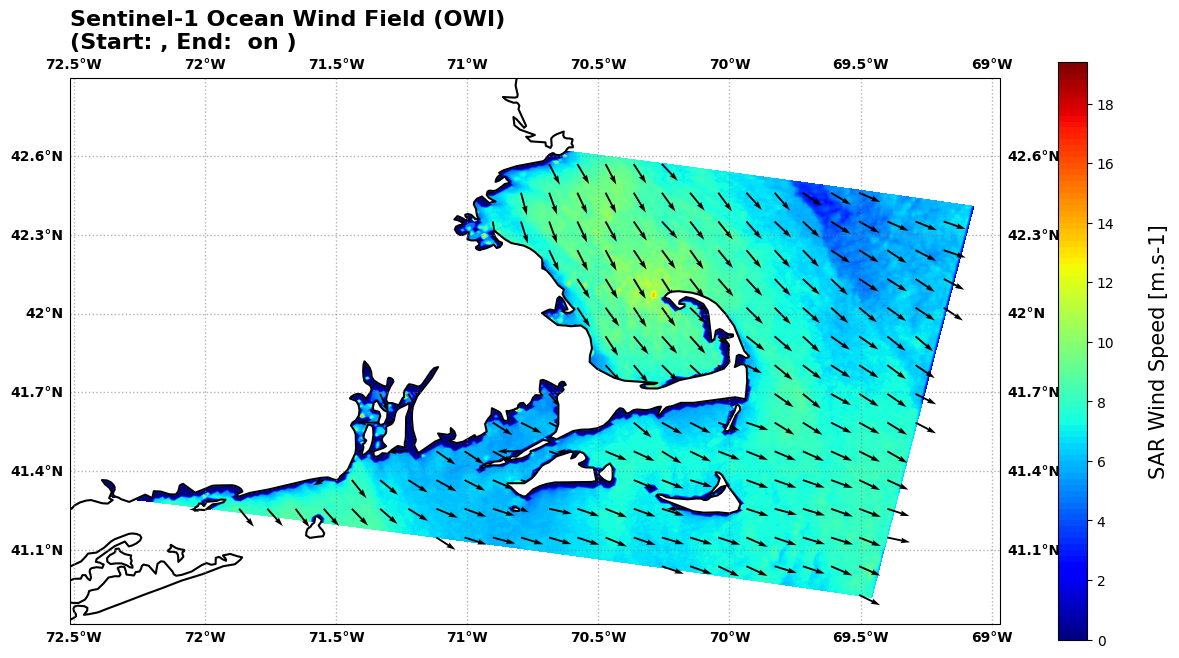

In [75]:
plot_wind_field_by_arrays(sample_data_cleaning)

In [58]:
sample_data_cleaning[0]

array([[6.457004 , 7.8906183, 8.2005005, ..., 0.       , 0.       ,
        0.       ],
       [6.2691026, 8.059928 , 8.069488 , ..., 0.       , 0.       ,
        0.       ],
       [6.737726 , 8.084535 , 7.8131485, ..., 0.       , 0.       ,
        0.       ],
       ...,
       [1.1299236, 5.9037776, 6.3113723, ..., 0.       , 0.       ,
        0.       ],
       [1.2321101, 6.0670195, 7.0140743, ..., 0.       , 0.       ,
        0.       ],
       [1.215738 , 6.636563 , 6.479719 , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [59]:
filled_speed

array([[6.457004 , 7.8906183, 8.2005005, ..., 6.702895 , 6.703121 ,
        6.703326 ],
       [6.2691026, 8.059928 , 8.069488 , ..., 6.7023973, 6.7026787,
        6.7029295],
       [6.737726 , 8.084535 , 7.8131485, ..., 6.701935 , 6.7022657,
        6.7025585],
       ...,
       [1.1299236, 5.9037776, 6.3113723, ..., 4.880664 , 4.8806906,
        4.880717 ],
       [1.2321101, 6.0670195, 7.0140743, ..., 4.880665 , 4.880691 ,
        4.8807173],
       [1.215738 , 6.636563 , 6.479719 , ..., 4.8806663, 4.8806925,
        4.880718 ]], dtype=float32)

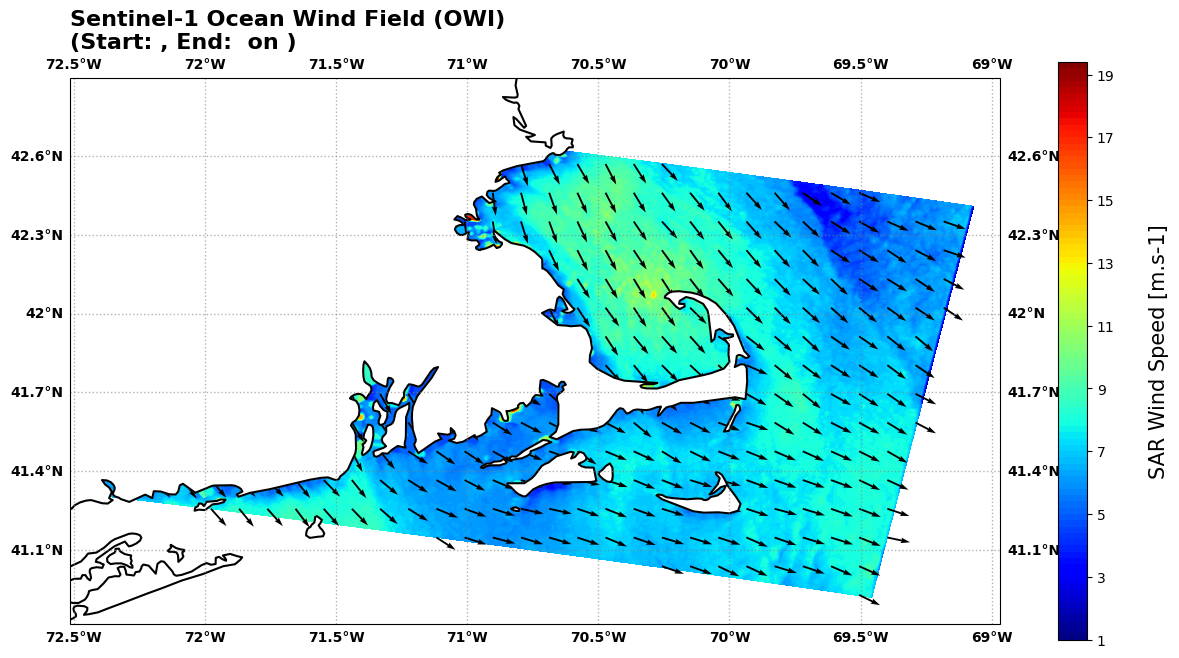

In [76]:
test = filled_speed, filled_direction, sample_data_cleaning[2], sample_data_cleaning[3]
plot_wind_field_by_arrays(test)

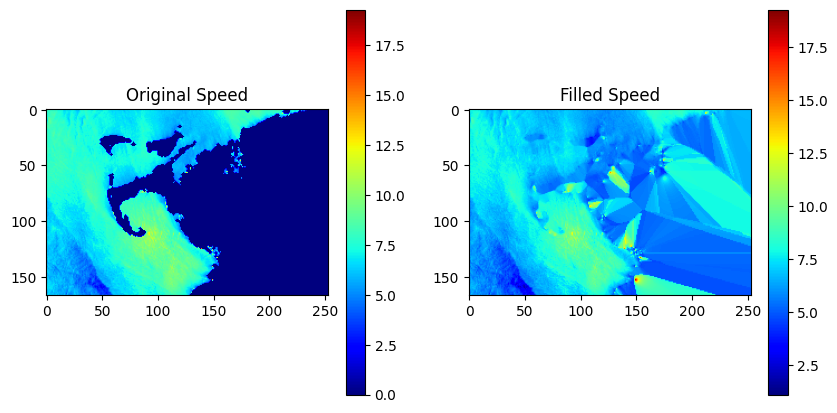

In [61]:
'''
5. Verify Results
'''
import matplotlib.pyplot as plt

# Plot the original and filled speed arrays for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Speed")
plt.imshow(speed, cmap='jet')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Filled Speed")
plt.imshow(filled_speed, cmap='jet')
plt.colorbar()
plt.show()

# Determine maximum lengths and columns for each array

In [37]:
max_length = max(arr[0].shape[0] for arr in all_arrays)

max_columns_wind_speed = max(arr[0].shape[1] for arr in all_arrays)
max_columns_wind_direction = max(arr[1].shape[1] for arr in all_arrays)
max_columns_latitude = max(arr[2].shape[1] for arr in all_arrays)
max_columns_longitude = max(arr[3].shape[1] for arr in all_arrays)

# Note that the rows & columns are consistent in each image. In other words, wind, direction, lat & lon have the same shape per image

## Pad each array and stack along a new third axis (depth-wise)

In [38]:
padded_data = []

for wind_speed, wind_direction, latitude, longitude in all_arrays:
    padded_wind_speed = np.pad(wind_speed, 
                               ((0, max_length - wind_speed.shape[0]), 
                                (0, max_columns_wind_speed - wind_speed.shape[1])), 
                               mode='constant', constant_values=np.nan)
    
    padded_wind_direction = np.pad(wind_direction, 
                                   ((0, max_length - wind_direction.shape[0]), 
                                    (0, max_columns_wind_direction - wind_direction.shape[1])), 
                                   mode='constant', constant_values=np.nan)
    
    padded_latitude = np.pad(latitude, 
                             ((0, max_length - latitude.shape[0]), 
                              (0, max_columns_latitude - latitude.shape[1])), 
                             mode='constant', constant_values=np.nan)
    
    padded_longitude = np.pad(longitude, 
                              ((0, max_length - longitude.shape[0]), 
                               (0, max_columns_longitude - longitude.shape[1])), 
                              mode='constant', constant_values=np.nan)
    
    # Stack padded arrays along a new third axis
    combined = np.dstack((padded_wind_speed, 
                          padded_wind_direction, 
                          padded_latitude, 
                          padded_longitude))
    
    padded_data.append(combined)

# Example: Access the combined array for the first SAR image
print(padded_data[0].shape)

(241, 286, 4)


- The array 'padded_data' contains the 5774 images. Each image has a shape of (241, 286, 4); there are 241 arrays and each of them has a shape of (286, 4). 

In [39]:
padded_data[0][...,3]

array([[-74.00143 , -73.99057 , -73.97971 , ...,        nan,        nan,
               nan],
       [-74.00357 , -73.99271 , -73.98185 , ...,        nan,        nan,
               nan],
       [-74.00571 , -73.99485 , -73.983986, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)

* [..., 0] and [:, :, 0] are similar in that they both select the first element along the last dimension of an array, but they differ in how they specify the preceding dimensions.

In [40]:

valid_data_masks = []  # Will hold valid (non-nan) masks for each image

for wind_speed, wind_direction, latitude, longitude in all_arrays:
    # Create a mask for valid (non-NaN) points
    valid_mask = ~np.isnan(wind_speed) & ~np.isnan(wind_direction)
    
    # Store the valid mask for later
    valid_data_masks.append(valid_mask)

# Let's print the shape of one of the valid masks to confirm it matches the original array
print(valid_data_masks[0].shape)  # Should match original wind_speed shape


(167, 255)


### Finding files acording to speed values
- file S1A_IW_OCN__2SDV_20170403T222528_20170403T222553_015986_01A5DF_AE79 came with a very high wind speed, need to check why - It seems this file was damaged

In [41]:
def check_speed(arr):
    return np.any(arr[..., 0] == 0)
speed_indices = [i for i, arr in enumerate(padded_data) if check_speed(arr)]
# l = []
# for i in range(len(all_arrays)):
#     l.append(i)
#     # if kde=True, color='blue'(all_arrays[i][0]):#.shape
#         # print (i)
len(speed_indices)

1346

In [93]:
np.any(all_arrays[25][0] == 0)

True

In [89]:
check_speed(all_arrays[25][0])

False

In [44]:
speed_indices[15]

25

In [27]:
all_arrays[speed_indices[14]]

(array([[ 0.       ,  0.       ,  0.       , ..., 14.076371 , 14.12312  ,
         14.330113 ],
        [ 0.       ,  0.       ,  0.       , ..., 15.629438 , 15.69696  ,
         16.01391  ],
        [ 0.       ,  0.       ,  0.       , ..., 15.7974205, 15.781864 ,
         16.053135 ],
        ...,
        [12.338964 , 13.40008  , 13.610775 , ...,  0.       ,  0.       ,
          0.       ],
        [12.626016 , 13.452051 , 13.51489  , ...,  0.       ,  0.       ,
          0.       ],
        [12.385536 , 13.764209 , 13.588437 , ...,  0.       ,  0.       ,
          0.       ]], dtype=float32),
 array([[180.      , 180.      , 180.      , ...,  31.620407,  31.613037,
          31.605637],
        [180.      , 180.      , 180.      , ...,  51.620193,  54.112762,
          54.105316],
        [180.      , 180.      , 180.      , ...,  54.119873,  54.112427,
          56.60498 ],
        ...,
        [ 25.98236 ,  40.974792,  38.467255, ..., 180.      , 180.      ,
         180.      

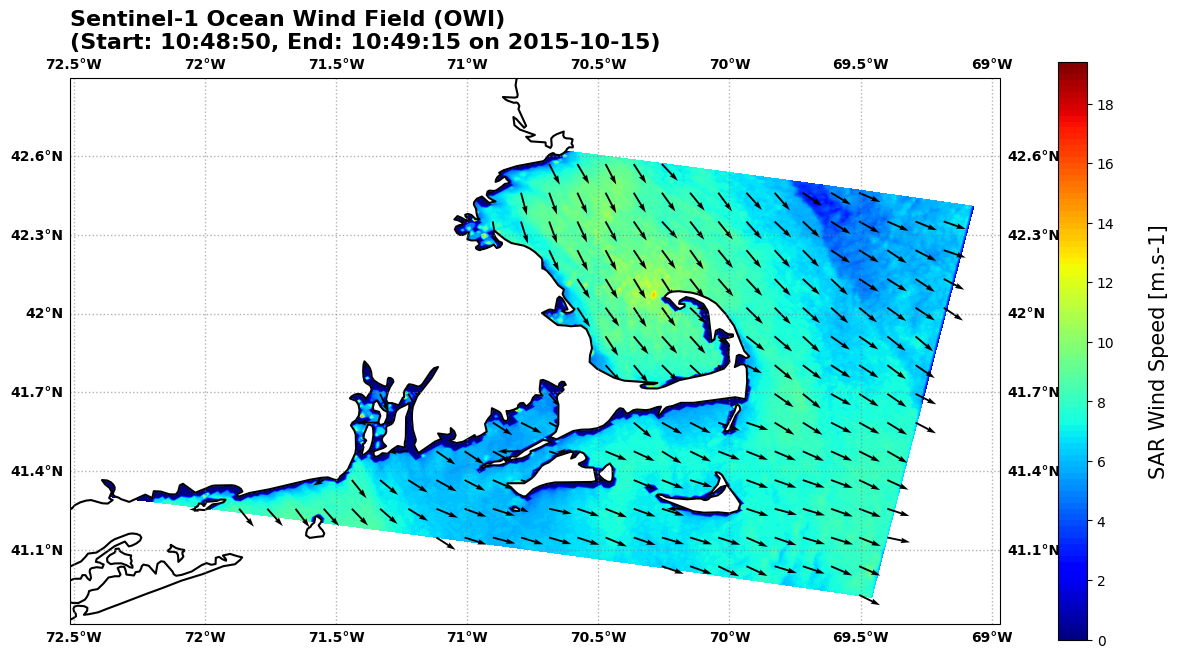

In [43]:
plot_wind_field(speed_indices[15])

### filling missing values by calculating mean according to the nearest neighboors

In [41]:
mask == (speed) ==

S1A_IW_OCN__2SDV_20150731T222600_20150731T222628_007061_0099AE_05B7


In [38]:
all_arrays[10][0]

array([[4.5013256, 6.1788177, 6.248541 , ..., 5.38965  , 5.387346 ,
        5.3801827],
       [4.482617 , 5.8353024, 5.8810997, ..., 5.46123  , 5.449244 ,
        5.516598 ],
       [4.6505117, 5.715635 , 5.536841 , ..., 5.5885844, 5.7025547,
        5.650661 ],
       ...,
       [3.3900952, 3.3475828, 3.3238745, ..., 0.       , 0.       ,
        0.       ],
       [3.5517235, 3.5767636, 3.2967858, ..., 0.       , 0.       ,
        0.       ],
       [1.3825192, 1.2764745, 1.4671897, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

# Analysis Wind Speed

In [11]:
all_wind_speeds = np.concatenate([arr[..., 0].flatten() for arr in padded_data])
filtered_wnd_speed = all_wind_speeds[~np.isnan(all_wind_speeds)]
len(all_wind_speeds)


397909798

## Visualizing the distribuition of the speeds

Mean Wind Speed: 7.23
Median Wind Speed: 6.72
Skewness of Wind Speed Distribution: 0.45
Identified Outliers: [21.04554  19.859734 20.515032 ... 19.7      20.       19.8     ]


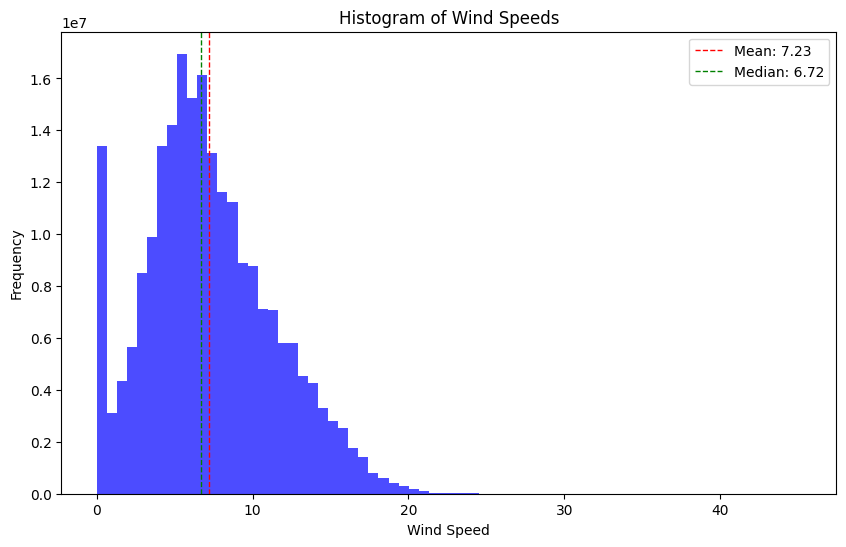

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, zscore

# Assuming all_wind_speeds is your NumPy array with potential np.nan values
mean_speed = np.nanmean(all_wind_speeds)
median_speed = np.nanmedian(all_wind_speeds)
skewness = skew(all_wind_speeds, nan_policy='omit')  # Skew ignores NaNs

# Z-score for identifying outliers, ignoring NaNs
z_scores = zscore(all_wind_speeds, nan_policy='omit')
outliers = all_wind_speeds[np.abs(z_scores) > 3]  # Common threshold for outliers

# Display statistics
print(f"Mean Wind Speed: {mean_speed:.2f}")
print(f"Median Wind Speed: {median_speed:.2f}")
print(f"Skewness of Wind Speed Distribution: {skewness:.2f}")
print(f"Identified Outliers: {outliers}")

plt.figure(figsize=(10, 6))
plt.hist(all_wind_speeds[~np.isnan(all_wind_speeds)], bins=70, color='blue', alpha=0.7)

# Plotting mean and median
plt.axvline(mean_speed, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_speed:.2f}')
plt.axvline(median_speed, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_speed:.2f}')

plt.title('Histogram of Wind Speeds')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Normalizing Speed data
### z-scores

In [16]:
# Calculate mean and std ignoring NaNs
mean_speed = np.nanmean(all_wind_speeds)
std_speed = np.nanstd(all_wind_speeds)

# Z-score normalization
normalized_speeds = (all_wind_speeds - mean_speed) / std_speed


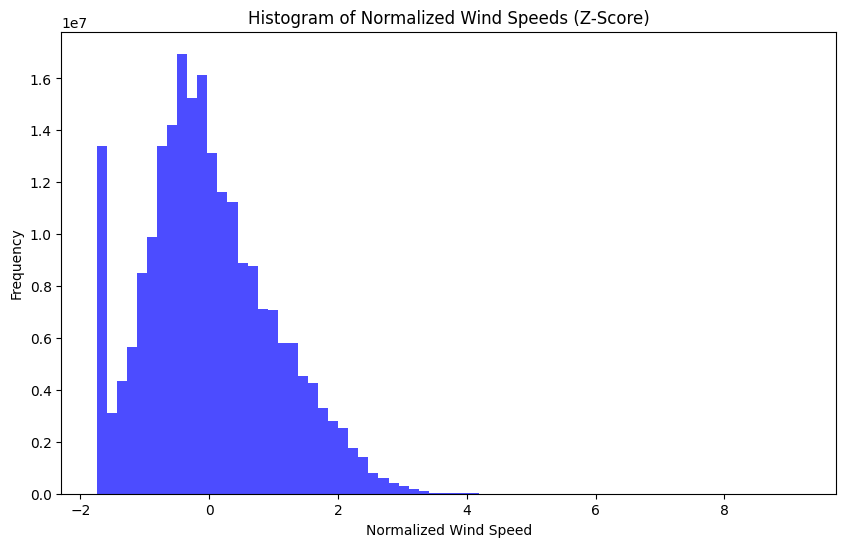

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(normalized_speeds[~np.isnan(normalized_speeds)], bins=70, color='blue', alpha=0.7)
plt.title('Histogram of Normalized Wind Speeds (Z-Score)')
plt.xlabel('Normalized Wind Speed')
plt.ylabel('Frequency')
plt.show()

## Creating the mask to remove values where the speed is 0 and greater than 40

In [80]:
valid_mask = (all_wind_speeds>0) & (all_wind_speeds<40)
valid_mask_with_zeros = all_wind_speeds<500

len(all_wind_speeds[valid_mask])

214638526

In [81]:
filtered_wnd_speed = all_wind_speeds[valid_mask]
mean_wind_speed = np.mean(filtered_wnd_speed)
std_wind_speed = np.std(filtered_wnd_speed)

normalized_wind_speed = (filtered_wnd_speed - mean_wind_speed) / std_wind_speed

In [89]:
mean_wind_speed = np.mean(filtered_wnd_speed)
median_wind_speed = np.median(filtered_wnd_speed)
std_wind_speed = np.std(filtered_wnd_speed)
min_wind_speed = np.min(filtered_wnd_speed)
max_wind_speed = np.max(filtered_wnd_speed)

print(f"Mean = {mean_wind_speed}")
print(f"Median = {median_wind_speed}")
print(f"Std = {std_wind_speed}")
print(f"Min = {min_wind_speed}")
print(f"Max = {max_wind_speed}")
      
      


Mean = 7.521703720092773
Median = 6.900000095367432
Std = 3.941035747528076
Min = 2.802709673233039e-07
Max = 39.971290588378906


In [22]:
plt.figure(figsize=(10,6))
plt.hist(normalized_wind_speed, bins=70, color='blue', alpha=0.7, kde=True)

plt.title('Histogram of Normalized Wind Speeds - After removing values with 0 speed')
plt.xlabel('Normalized Wind Speed (z-score)')
plt.ylabel('Frequency')
plt.show()

NameError: name 'normalized_wind_speed' is not defined

<Figure size 1000x600 with 0 Axes>

In [92]:
from scipy.stats import skew, kurtosis

skewness = skew(normalized_wind_speed)
kurt = kurtosis(normalized_wind_speed)
# plt.boxplot(normalized_wind_speed, vert=False)
# plt.show()

In [95]:
skewness

0.5687954539981539

# Direction

In [110]:
all_wind_directions = np.concatenate([arr[:, :, 1].flatten() for arr in padded_data])


In [111]:
np.min(all_wind_directions[~np.isnan(all_wind_directions)])

0.0

In [113]:
len(all_wind_directions)

397978724

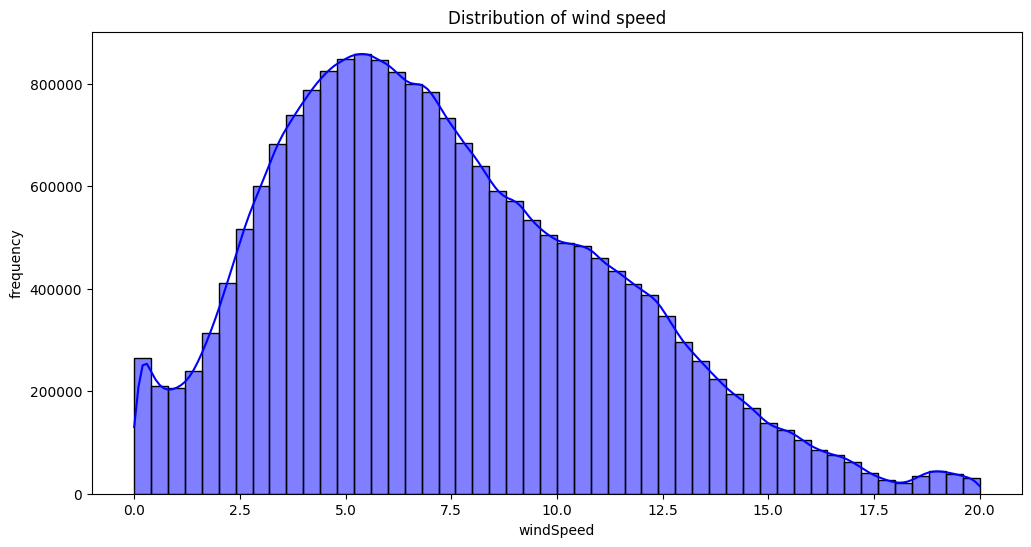

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(all_wind_speeds[valid_mask][:20000000], bins=50, kde=True, color='blue')
plt.title('Distribution of wind speed')
plt.xlabel('windSpeed')
plt.ylabel('frequency')
plt.show()

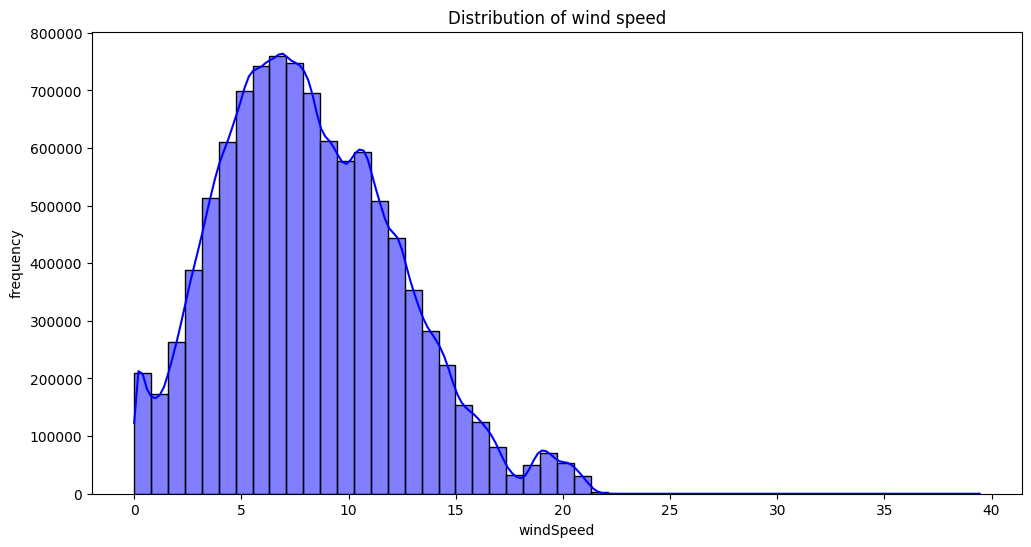

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(all_wind_speeds[valid_mask][10000000:20000000], bins=50, kde=True, color='blue')
plt.title('Distribution of wind speed')
plt.xlabel('windSpeed')
plt.ylabel('frequency')
plt.show()

# Apply the clustering... (still in review)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Extract valid data points based on the valid mask
valid_data_points = []

for idx, (wind_speed, wind_direction, latitude, longitude) in enumerate(all_arrays):
    # Get the valid mask for this image
    valid_mask = valid_data_masks[idx]
    
    # Extract only valid (non-nan) data points for each feature
    valid_wind_speed = wind_speed[valid_mask]
    valid_wind_direction = wind_direction[valid_mask]
    valid_latitude = latitude[valid_mask]
    valid_longitude = longitude[valid_mask]
    
    # Combine the valid data points into a single array (rows: valid pixels, columns: features)
    valid_combined = np.column_stack((valid_wind_speed, valid_wind_direction, valid_latitude, valid_longitude))
    
    valid_data_points.append(valid_combined)

# Step 2: Stack all valid data points across images into one large dataset
all_valid_data = np.vstack(valid_data_points)

# Step 3: Normalize the data
scaler = StandardScaler()
all_valid_data_scaled = scaler.fit_transform(all_valid_data)

# Step 4: Apply K-Means Clustering
n_clusters = 2  # Adjust based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(all_valid_data_scaled)

# Step 5: Get cluster labels
cluster_labels = kmeans.labels_

# Step 6: Now, we need to assign the cluster labels back to the valid points in the original images
reshaped_labels = []
start_idx = 0

for idx, valid_mask in enumerate(valid_data_masks):
    num_valid_points = np.sum(valid_mask)  # Number of valid data points in this image
    
    # Extract the cluster labels corresponding to the valid points for this image
    labels = cluster_labels[start_idx:start_idx + num_valid_points]
    
    # Create an empty array to store the labels, with the same shape as the padded arrays
    label_array = np.full(valid_mask.shape, np.nan)  # Fill with np.nan for invalid points
    
    # Fill valid points with cluster labels
    label_array[valid_mask] = labels
    
    reshaped_labels.append(label_array)  # Add to the list of reshaped labels
    
    # Move to the next set of labels in the cluster_labels array
    start_idx += num_valid_points

# The reshaped_labels list now contains the cluster labels for each image, with np.nan in padded areas


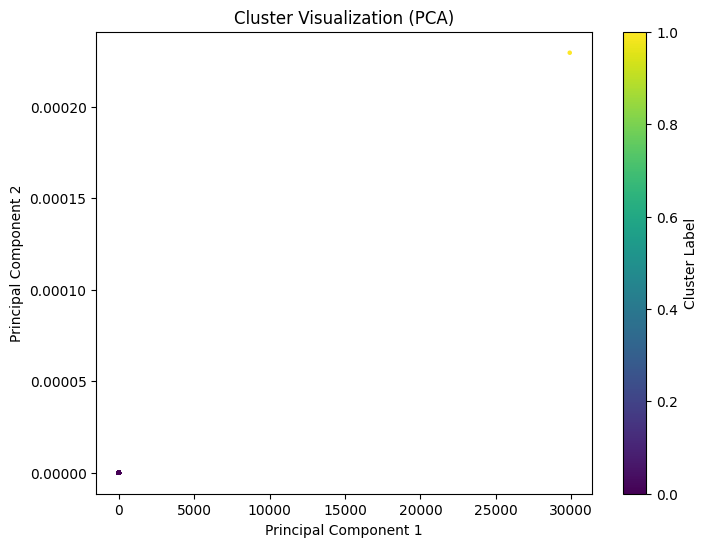

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(all_valid_data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', s=5)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Flatten each combined 3D array into a 2D array
# Shape before flattening: (max_length, max_columns, 4)
# Shape after flattening: (max_length * max_columns, 4)

flattened_data = []
for combined_array in padded_data:
    # Flatten to shape (max_length * max_columns, 4)
    flattened_array = combined_array.reshape(-1, 4)  # Flatten spatial dimensions, keep feature layers
    flattened_data.append(flattened_array)

# Step 2: Stack all flattened arrays into one dataset
# Concatenate to shape (n_samples, 4), where n_samples = sum of all image sizes
all_data = np.vstack(flattened_data)

# Step 3: Remove rows with np.nan (in case some areas were padded)
all_data_clean = all_data[~np.isnan(all_data).any(axis=1)]

# Step 4: Normalize the data to ensure each feature is on the same scale
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data_clean)

# Step 5: Apply K-Means Clustering (you can try other algorithms too)
n_clusters = 5  # Set number of clusters (can be adjusted)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(all_data_scaled)

# Step 6: Get the cluster labels
cluster_labels = kmeans.labels_

# Step 7: Reshape the cluster labels back into the original spatial structure (for visualization)
reshaped_labels = []
start_idx = 0

for combined_array in padded_data:
    original_shape = combined_array.shape[:2]  # (max_length, max_columns)
    num_pixels = original_shape[0] * original_shape[1]
    
    # Extract the corresponding labels for this image and reshape
    labels = cluster_labels[start_idx:start_idx + num_pixels]
    reshaped_labels.append(labels.reshape(original_shape))
    
    start_idx += num_pixels

# Now, reshaped_labels contains the clustering result for each SAR image
print(reshaped_labels[0].shape)  # Shape of the clustering result for the first image


/home/noriegac/.conda/envs/cris_env/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


ValueError: cannot reshape array of size 52461 into shape (241,286)

In [145]:
padded_longitude.shape#[:241,:]

(241, 286)

In [98]:
max_columns_longitude

286

In [99]:
max_columns_wind_direction

286

In [100]:
max_columns_wind_speed

286